In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/Othercomputers/My MacBook Pro/highway-env-tibi')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install gym==0.24.1
!pip install pygame


You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 8.4 MB 3.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((400, 300))

In [2]:
import gym
import highway_env

env = gym.make('highwayadv-v0')
env.seed(0)

env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env.configure({"vehicles_count": 0})  # A single other vehicle, for the sake of visualisation
env.reset()

import pprint
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 2,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 0,
 'vehicles_density': 1}


/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

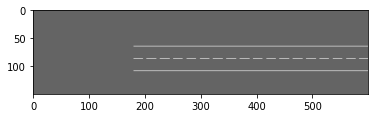

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

env.config["lanes_count"] = 2
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [5]:
!pip install stable-baselines3

     |████████████████████████████████| 177 kB 411 kB/s eta 0:00:01
     |████████████████████████████████| 48.9 MB 12.1 MB/s eta 0:00:01   |█                               | 1.7 MB 8.6 MB/s eta 0:00:06
  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.24.1
    Uninstalling gym-0.24.1:
      Successfully uninstalled gym-0.24.1
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [7]:
from gym import spaces

In [8]:
from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

: 

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()